## Crossover

### Simulated Binary Crossover ('real_sbx', 'int_sbx')

Details about the crossover can be found in <cite data-cite="sbx"></cite>. Real values can be represented by a binary notation and then a the point crossovers can be performed. SBX simulated this operation by using a probability distribution *simulating* the binary crossover.

A crossover object can be created by 

In [1]:
from pymoo.factory import get_crossover

crossover = get_crossover("real_sbx", prob=0.9, eta=20)

As arguments, the probability of a crossover and the *eta* parameter can be provided.

In the example below, we demonstrate a crossover in an optimization problem with only one variable. A crossover is performed between two points, *0.2* and *0.8*, and the resulting exponential distribution is visualized. Depending on the *eta_cross*, the exponential distribution can be fine-tuned.

The probability of SBX follows an exponential distribution. Please note for demonstration purposes, we have set *prob_per_variable=1.0*, which means every variable participates in the crossover (necessary because there exists only one variable). However, it is suggested to perform a crossover of two variables forms each parent with a probability of *0.5*, which is defined by default if not defined otherwise.

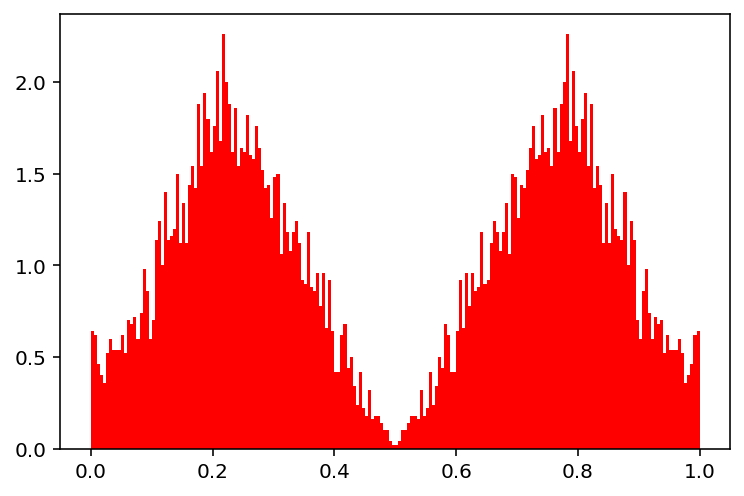

In [2]:
from pymoo.interface import crossover
import numpy as np
import matplotlib.pyplot as plt

def show(eta_cross):
    a,b = np.full((5000, 1), 0.2), np.full((5000, 1), 0.8)
    off = crossover(get_crossover("real_sbx", prob=1.0, eta=eta_cross, prob_per_variable=1.0), a, b)

    plt.hist(off, range=(0,1), bins=200, density=True, color="red")
    plt.show()

show(1)

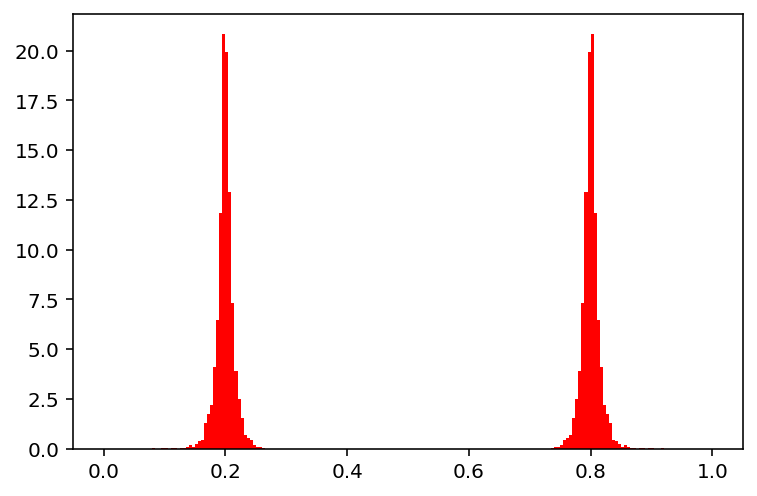

In [3]:
show(30)

Also, it can be used for integer variables. The bounds are slightly modified, and after doing the crossover, the variables are rounded.

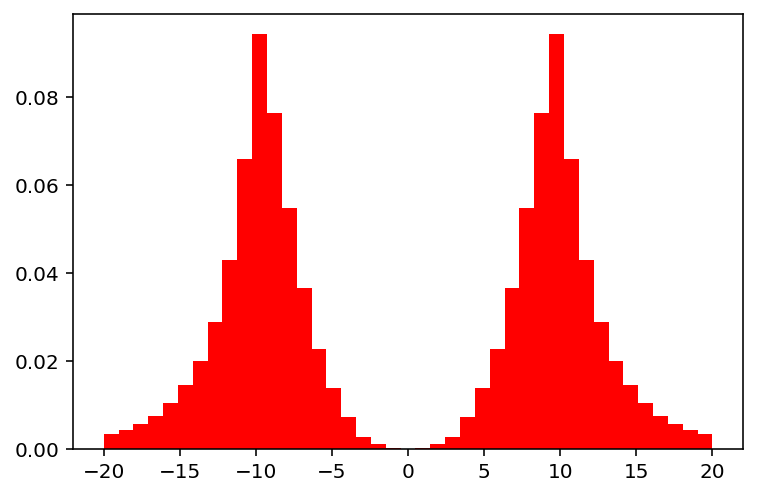

In [4]:
from pymoo.factory import get_crossover
from pymoo.interface import crossover
import numpy as np
import matplotlib.pyplot as plt

def show(eta_cross):
    a,b = np.full((50000, 1), -10), np.full((50000, 1), +10)
    off = crossover(get_crossover("int_sbx", prob=1.0, eta=eta_cross, prob_per_variable=1.0), a, b, xl=-20, xu=+20)
    val, count = np.unique(off, return_counts=True)
    #print(np.column_stack([val, count / count.sum()]))
    plt.hist(off, range=(-20, 20), bins=41, density=True, color="red")
    plt.show()

show(3)

### Point Crossover ('real_point', 'bin_point', 'int_point' )


The point crossover is mostly applied to binary optimization problems. However, in general, it can be used for other variable representations. 

The point crossover can be initiated by

In [5]:
crossover = get_crossover("real_k_point", n_points=2)

For any number of points that are desired. Additionally, for convenience the 
single- or two-point crossover is created by

In [6]:
get_crossover("real_one_point")
get_crossover("real_two_point")

directly. 

One Point Crossover


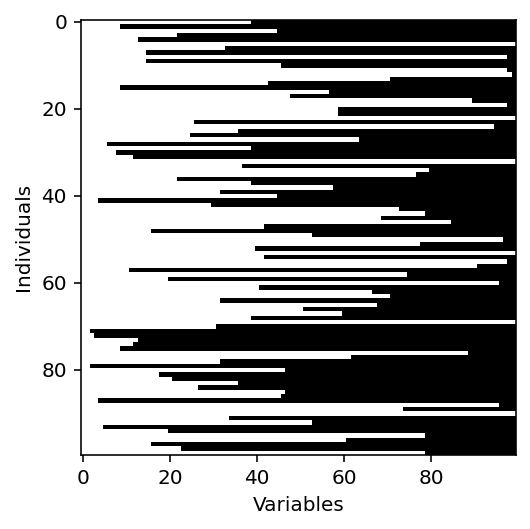

Two Point Crossover


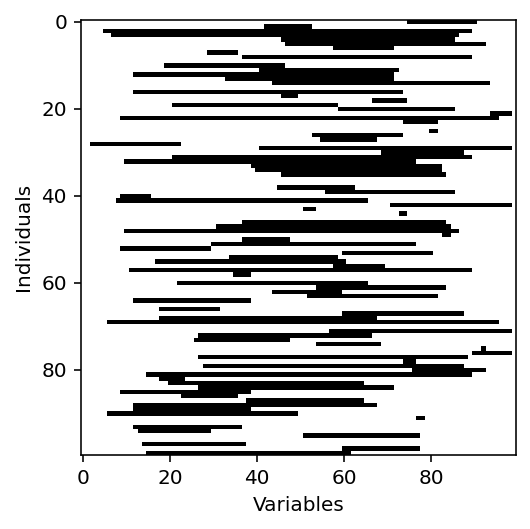

K Point Crossover (k=4)


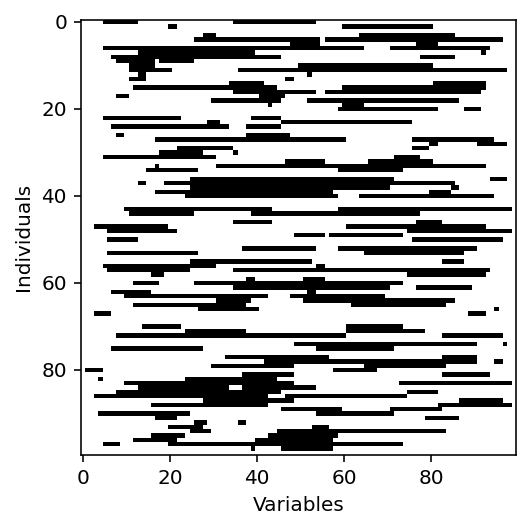

In [7]:
from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt

def example_parents(n_matings, n_var):
    a = np.arange(n_var)[None, :].repeat(n_matings, axis=0)
    b = a + n_var
    return a, b
    

def show(M):
    plt.figure(figsize=(4,4))
    plt.imshow(M, cmap='Greys',  interpolation='nearest')
    plt.xlabel("Variables")
    plt.ylabel("Individuals")
    plt.show()

n_matings, n_var = 100, 100
a,b = example_parents(n_matings,n_var)

print("One Point Crossover")
off = crossover(get_crossover("bin_one_point"), a, b)
show((off[:n_matings] != a[0]))

print("Two Point Crossover")
off = crossover(get_crossover("bin_two_point"), a, b)
show((off[:n_matings] != a[0]))

print("K Point Crossover (k=4)")
off = crossover(get_crossover("bin_k_point", n_points=4), a, b)
show((off[:n_matings] != a[0]))

### Uniform Crossover ('real_ux', 'bin_ux', 'int_ux')


The uniform crossover takes with a probability of 0.5 the values from each parent. 
In contrast to a point crossover, not a sequence of variables is taken, but random indices.

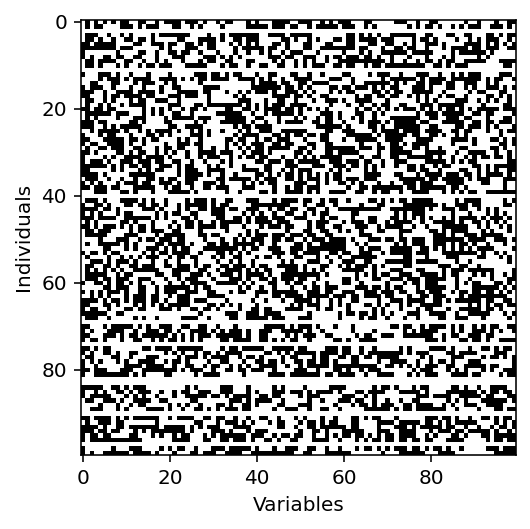

In [8]:
off = crossover(get_crossover("bin_ux"), a, b)
show((off[:n_matings] != a[0]))

### Half Uniform Crossover ('bin_hux', 'int_hux')


The half uniform crossover will first determine what indices are different in the first and the second parent. Then, it will take half of the difference to be selected from the other parent.

Here, a and b are different for indices:  [ 5 15 25 35 45 55 65 75 85 95]


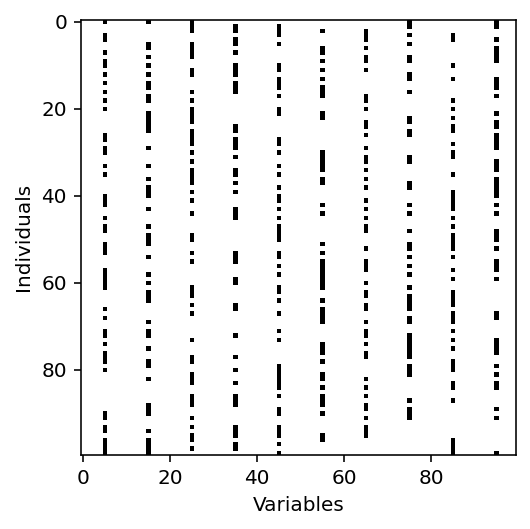

Difference in bits (a to b):  1000
Difference in bits (a to off):  475
Crossover Rate:  0.475


In [9]:
_a = np.full((100,100), False)
_b = np.copy(_a)
_b[:, np.linspace(5, 95, 10).astype(int)] = True

print("Here, a and b are different for indices: ", np.where(_a[0] != _b[0])[0])

off = crossover(get_crossover("bin_hux"), _a, _b)
show((off[:100] != _a[0]))

diff_a_to_b = (_a != _b).sum()
diff_a_to_off = (_a != off[:100]).sum()

print("Difference in bits (a to b): ", diff_a_to_b)
print("Difference in bits (a to off): ", diff_a_to_off)

print("Crossover Rate: ", diff_a_to_off / diff_a_to_b)



### Exponential Crossover ('real_exp', 'bin_exp', 'int_exp')


The exponential crossover is mostly a one-point crossover, but occasionally it can be a two-point crossover. 
First, randomly a starting index is chosen. Then, we add the next variable to be mutated with a specific probability. If we reach the last variable, we continue with the first (wrap around).

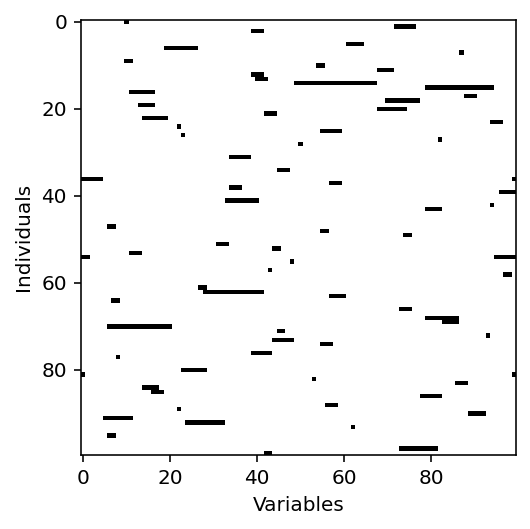

In [10]:
off = crossover(get_crossover("real_exp", prob=0.95), a, b)
show((off[:n_matings] != a[0]))

### Differential Crossover ('real_de')


The differential crossover is used in the [differential evolution algorithm](../algorithms/differential_evolution.ipynb). It adds the difference of two individuals to another one.

It can be initiated by

In [11]:
crossover = get_crossover("real_de")

In the following, the different creating of donor vectors is shown. The difference between $x_{\pi_2} - x_{\pi_3}$ is added with different weights $F \in (0, 1)$ to $x_{\pi_1}$. The resulting donor solution can be used for further evolutionary recombinations (for example, DE uses it for another crossover).

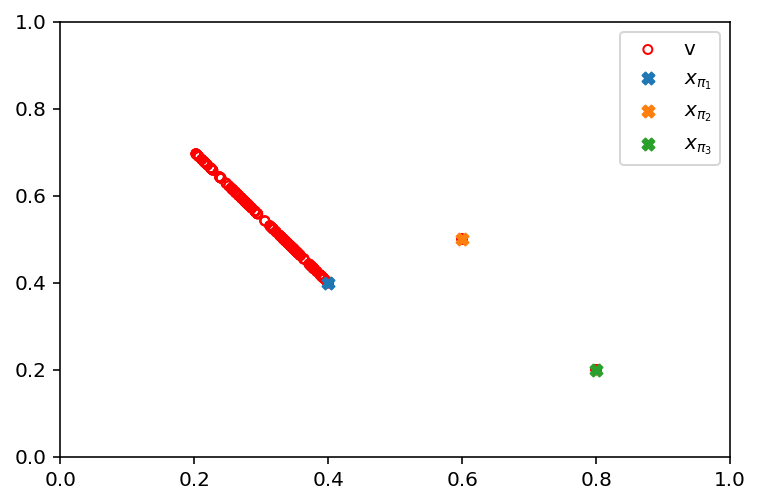

In [12]:
from pymoo.factory import get_crossover
from pymoo.interface import crossover
import numpy as np
import matplotlib.pyplot as plt

c = np.array([[0.8, 0.2]])
a = np.array([[0.4, 0.4]])
b = np.array([[0.6, 0.5]])

X = crossover(get_crossover("real_de", weight=0.0, dither='vector'),
              a.repeat(100, axis=0), b.repeat(100, axis=0), c.repeat(100, axis=0))

plt.scatter(X[:, 0], X[:, 1], s=20,facecolors='none', edgecolors='r', label="v")
plt.scatter(a[:, 0], a[:, 1], label="$x_{\pi_1}$", marker="X")
plt.scatter(b[:, 0], b[:, 1], label="$x_{\pi_2}$", marker="X")
plt.scatter(c[:, 0], c[:, 1], label="$x_{\pi_3}$", marker="X")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

### API